## Covid-19 outbreak data analysis
By Sof Taamallah - March 2020

Last update: April 2nd 2020

In [34]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [35]:
# import the packages needed, the latest data and understanding the columns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py
from scipy.interpolate import spline
from IPython.display import YouTubeVideo


# import the data from ECDC
# European CDC site: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
# data is available daily and updated between 10pm and 11pm Central European Time.

url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-04-02.xlsx'
df = pd.read_excel(url, sheet_name=0, header=0, index_col=0)
list_columns = df.columns.values
#print(list_columns)
df.rename(columns={'countriesAndTerritories':'country'}, inplace=True)


# extract countries
df_china = df[df['country'] == 'China']
df_france = df[df['country'] == 'France']
df_italy = df[df['country'] == 'Italy']
df_spain = df[df['country'] == 'Spain']
df_usa = df[df['countryterritoryCode'] == 'USA']
df_netherlands = df[df['country'] == 'Netherlands']
df_germany = df[df['country'] == 'Germany']
df_tunisia = df[df['country'] == 'Tunisia']
df_uk = df[df['geoId'] == 'UK']
df_korea = df[df['country'] == 'South_Korea']

#df_france.head(5)




# clean up data and outliers
#print(df_china.loc['2020-02-14', 'cases'])
#print(df_china.loc['2020-02-12', 'cases'])
df_china.loc['2020-02-13', 'cases'] = np.mean([4156, 2028])

#print(df_china.loc[df_china.index == '2020-02-13', 'deaths'])
#df_china['deaths'] = np.mean([4156, 2028])
#print(df_china.loc['2020-02-14', 'deaths'])
#print(df_china.loc['2020-02-13', 'deaths'])
df_china.loc['2020-02-13', 'deaths'] = np.mean([13, 254])
df_china.loc['2020-02-14', 'deaths'] = np.mean([13, 254])


;


/Users/lindseyholiday/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



''

In [46]:
# add data manually if data is available from other source before it appears in the ECDC data



new_row_france = pd.DataFrame({'day':3, 'month':4, 'year':2020, 
                        'cases':2116, 'deaths':471, 'country':'France', 
                        'geoId':'FR', 'countryterritoryCode':'FRA', 'popData2018':66987244.0}, 
                                                            index =['2020-04-03']) 
df_france = pd.concat([new_row_france, df_france]).reset_index(drop = False) 
df_france.set_index('index',inplace=True)
#df_france.head(5)
#____________________________________________



new_row_italy = pd.DataFrame({'day': 3, 'month':4, 'year':2020, 
                        'cases':4668, 'deaths':760, 'country':'Italy', 
                        'geoId':'It', 'countryterritoryCode':'ITA', 'popData2018':66987244.0}, 
                                                            index =['2020-04-03'])
df_italy = pd.concat([new_row_italy, df_italy]).reset_index(drop = False) 
df_italy.set_index('index',inplace=True)
#df_italy.head(5)
#____________________________________________


new_row_spain = pd.DataFrame({'day': 3, 'month':4, 'year':2020, 
                        'cases':6120, 'deaths':709, 'country':'Spain', 
                        'geoId':'Sp', 'countryterritoryCode':'SPA', 'popData2018':66987244.0}, 
                                                            index =['2020-04-03']) 
df_spain = pd.concat([new_row_spain, df_spain]).reset_index(drop = False) 
df_spain.set_index('index',inplace=True)
#df_spain.head(5)
#____________________________________________



new_row_uk = pd.DataFrame({'day': 3, 'month':4, 'year':2020, 
                        'cases':4244, 'deaths':569, 'country':'United_Kingdom', 
                        'geoId':'UK', 'countryterritoryCode':'GBR', 'popData2018':66987244.0}, 
                                                            index =['2020-04-03']) 
df_uk = pd.concat([new_row_uk, df_uk]).reset_index(drop = False) 
df_uk.set_index('index',inplace=True)
#df_spain.head(5)
#____________________________________________


new_row_germany = pd.DataFrame({'day': 3, 'month':4, 'year':2020, 
                        'cases':5770, 'deaths':124, 'country':'Germany', 
                        'geoId':'DE', 'countryterritoryCode':'DEU', 'popData2018':66987244.0}, 
                                                            index =['2020-04-03']) 
df_germany = pd.concat([new_row_germany, df_germany]).reset_index(drop = False) 
df_germany.set_index('index',inplace=True)
#df_spain.head(5)
#____________________________________________



'''
new_row_usa = pd.DataFrame({'day': 2, 'month':4, 'year':2020, 
                        'cases':26473, 'deaths':1049, 'country':'United_States_of_America', 
                        'geoId':'US', 'countryterritoryCode':'USA', 'popData2018':66987244.0}, 
                                                            index =['2020-04-02']) 
df_usa = pd.concat([new_row_usa, df_usa]).reset_index(drop = False) 
df_usa.set_index('index',inplace=True)
#df_us.head(5)
#____________________________________________

'''
;

''

In [47]:

def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=np.zeros(len(data))
    for i in range(degree, len(data) - degree):
        point=data[i-degree:i-degree+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle))
       
        
    # Handle boundaries
    smoothed[:degree] = data[:degree]
    #smoothed[1] = (1*data[0] + 2*data[1] + 1*data[2])/4
    #smoothed[0] = (2*data[0]+1*data[1])/3
    #smoothed[-degree:] = data[-degree:]
    smoothed[-2] = (1*data[-3] + 2*data[-2] + 1*data[-1])/4
    smoothed[-1] = (1*data[-2] + 2*data[-1])/3
    return smoothed


In [48]:
# function to smooth the data 

def smooth_9day(data):
    triangle=[1,1,1,1,1,1,1,1,1]
    smoothed=np.zeros(len(data))
    for i in range(4, len(data)-5):
        point=data[i-4:i-4+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle))
       
        
    # Handle boundaries
    smoothed[0] = (data[0]+data[1]+data[2]) / 3
    smoothed[1] = (data[0]+data[1]+data[2]+data[3]) / 4
    smoothed[2] = (data[0]+data[1]+data[2]+data[3]+data[4]) / 5
    smoothed[3] = (data[0]+data[1]+data[2]+data[3]+data[4]+data[5]) / 6


    smoothed[-1] = (data[-1]+data[-2]+data[-3]) / 3
    smoothed[-2] = (data[-1]+data[-2]+data[-3]+data[-4]) / 4
    smoothed[-3] = (data[-1]+data[-2]+data[-3]+data[-5]) / 5
    smoothed[-4] = (data[-1]+data[-2]+data[-3]+data[-5]+data[-6]) / 6

    
    return smoothed

In [49]:
# function to smooth the data 

def smooth_7day(data):
    triangle=[1,1,1,1,1,1,1]
    smoothed=np.zeros(len(data))
    for i in range(3, len(data)-4):
        point=data[i-3:i-3+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle))
       
        
    # Handle boundaries
    smoothed[0] = (data[0]+data[1]+data[2]) / 3
    smoothed[1] = (data[0]+data[1]+data[2]+data[3]) / 4
    smoothed[2] = (data[0]+data[1]+data[2]+data[3]+data[4]) / 5

    smoothed[-1] = (data[-1]+data[-2]+data[-3]) / 3
    smoothed[-2] = (data[-1]+data[-2]+data[-3]+data[-4]) / 4
    smoothed[-3] = (data[-1]+data[-2]+data[-3]+data[-5]) / 5
    
    return smoothed

In [50]:
# function to smooth the data 

def smooth_5day(data):
    triangle=[1,1,1,1,1]
    smoothed=np.zeros(len(data))
    for i in range(2, len(data)-3):
        point=data[i-2:i-2+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle))
       
        
    # Handle boundaries
    smoothed[0] = (data[0]+data[1]+data[2]) / 3
    smoothed[1] = (data[0]+data[1]+data[2]+data[3]) / 4
    smoothed[-1] = (data[-1]+data[-2]+data[-3]) / 3
    smoothed[-2] = (data[-1]+data[-2]+data[-3]+data[-4]) / 4

    return smoothed

In [51]:
# function to smooth the data 

def smooth_3day(data):
    triangle=[1,1,1]
    smoothed=np.zeros(len(data))
    for i in range(1, len(data)-2):
        point=data[i-1:i-1+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle))
       
        
    # Handle boundaries
    #smoothed[0] = (data[0]+data[1]) / 2
    smoothed[0] = (data[0]+data[1]) / 2
    
    #smoothed[-1] = (data[-1]+data[-2]) / 2
    smoothed[-1] = (data[-1]+data[-2]) / 2
    
    return smoothed

# 1 - Daily Covid-19 death toll evolution

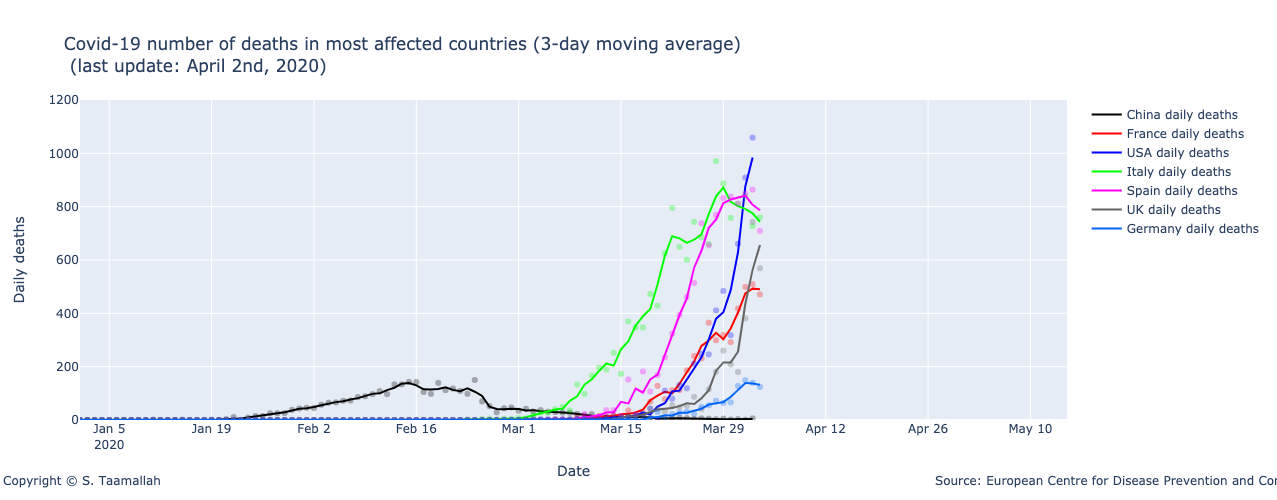

In [56]:
#degree = 2
#smooth_italy = smoothTriangle(df_italy['deaths'],degree)


smooth_china = smooth_3day(df_china['deaths'])
smooth_france = smooth_3day(df_france['deaths'])
smooth_italy = smooth_3day(df_italy['deaths'])
smooth_usa = smooth_3day(df_usa['deaths'])
smooth_uk = smooth_3day(df_uk['deaths'])
smooth_germany = smooth_3day(df_germany['deaths'])
smooth_spain = smooth_3day(df_spain['deaths'])
smooth_korea = smooth_3day(df_korea['deaths'])
smooth_netherlandss = smooth_3day(df_netherlands['deaths'])



# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='markers',
        name='China daily cases',
        line_color='rgba(0, 0, 0, .3)',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_china.index, 
        y=smooth_china,
        mode='lines',
        name='China daily deaths',
        line_color='rgba(0, 0, 0, 1)',
)


trace2 = go.Scatter(
        x=df_france.index, 
        y=df_france['deaths'],
        mode='markers',
        name='France daily cases',
        line_color='rgba(256, 0, 0, .3)',
        showlegend=False,
)

trace22 = go.Scatter(
        x=df_france.index, 
        y=smooth_france,
        mode='lines',
        name='France daily deaths',
        line_color='rgba(256, 0, 0, 1)',
)


trace3 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['deaths'],
        mode='markers',
        name='USA daily deaths',
        line_color='rgba(0, 0, 255, .3)',
    showlegend=False,
)

trace33 = go.Scatter(
        x=df_usa.index, 
        y=smooth_usa,
        mode='lines',
        name='USA daily deaths',
        line_color='rgba(0, 0, 255, 1)',
)

trace4 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['deaths'],
        mode='markers',
        name='Italy daily deaths',
        line_color='rgba(0, 256, 0, .3)',
    showlegend=False,
)

trace44 = go.Scatter(
        x=df_italy.index, 
        y=smooth_italy,
        mode='lines',
        name='Italy daily deaths',
        line_color='rgba(0, 256, 0, 1)',
)

trace5 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['deaths'],
        mode='markers',
        name='Spain daily deaths',
        line_color='rgba(255, 0, 255, .3)',
    showlegend=False,
)

trace55 = go.Scatter(
        x=df_spain.index, 
        y=smooth_spain,
        mode='lines',
        name='Spain daily deaths',
        line_color='rgba(256, 0, 256, 1)',
)


trace6 = go.Scatter(
        x=df_uk.index, 
        y=df_uk['deaths'],
        mode='markers',
        name='UK daily deaths',
        line_color='rgba(100, 100, 100, .3)',
    showlegend=False
)

trace66 = go.Scatter(
        x=df_uk.index, 
        y=smooth_uk,
        mode='lines',
        name='UK daily deaths',
        line_color='rgba(100, 100, 100, 1)',
)

trace7 = go.Scatter(
        x=df_germany.index, 
        y=df_germany['deaths'],
        mode='markers',
        name='Germany daily deaths',
        line_color='rgba(0, 100, 250, .3)',
    showlegend=False,
)

trace77 = go.Scatter(
        x=df_germany.index, 
        y=smooth_germany,
        mode='lines',
        name='Germany daily deaths',
        line_color='rgba(0, 100, 250, 1)',
)


data = [trace1,trace11, trace2, trace22, trace3, trace33, trace4, trace44, trace5, trace55, trace6, trace66, trace7, trace77]

layout = go.Layout(
    title="Covid-19 number of deaths in most affected countries (3-day moving average) <br> (last update: April 2nd, 2020)",
    width=1100,
    height=500,
    
    # Top left
    xaxis=dict(
        title='Date',
        range=['2020-01-01', '2020-05-15'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,1200],
        anchor='x'
    ),
    
      annotations=[
        dict(
            x=1.24,
            y=-0.22,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.08,
            y=-0.22,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
)



fig = go.Figure(data=data, layout=layout)

'''

fig.add_annotation(
        x='2020-01-23',
        y=20,
        xref="x",
        yref="y",
        text="Wuhan lockdown <br> 2020-01-23 ",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-40,
        ay=-60,
        #bordercolor="#c7c7c7",
        #borderwidth=2,
        #borderpad=4,
        #bgcolor="#ff7f0e",
        #opacity=0.8
        )


fig.add_annotation(
        x='2020-03-10',
        y=150,
        xref="x",
        yref="y",
        text="Italy lockdown <br> 2020-03-09 <br> bars, restaurants: <br> 2020-03-11",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-300,
        ay=-180,
        #bordercolor="#c7c7c7",
        #borderwidth=2,
        #borderpad=4,
        #bgcolor="#ff7f0e",
        #opacity=0.8
        )


fig.add_annotation(
            x='2020-03-17',
            y=30,
            text="France lockdown <br> 2020-03-17 ",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-120,
        ay=-260,
)


fig.add_annotation(
            x='2020-03-15',
            y=20,
            text="Spain lockdown <br> 2020-03-15 ",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-200,
        ay=-240,
)


fig.add_annotation(
            x='2020-05-1',
            y=90,
            text="UK lockdown <br> 2020-03-22 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=180,
        ay=-60,
)

fig.add_annotation(
            x='2020-05-1',
            y=300,
            text="Germany social distancing <br> 2020-03-23 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=180,
        ay=-60,
)

fig.add_annotation(
            x='2020-05-1',
            y=1200,
            text="USA federal <br> social distancing <br> 2020-03-16 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=200,
        ay=-520,
)

fig.add_annotation(
            x='2020-05-1',
            y=900,
            text="New york shutdown <br> 2020-03-22 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=200,
        ay=-420,
)



fig.add_annotation(
            x='2020-05-1',
            y=600,
            text="California lockdown <br> 2020-03-19 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=200,
        ay=-320,
)

'''




fig.show()

#from plotly.offline import plot
#plot(fig, filename="STaamallah_covid19_analysis_chart_2_20200331.html", auto_open = False)

<br/>
<br/>

While most countries implemented a form of social distancing in March 2020, the covid-19 daily death toll continues to rise in Europe and the United States. The number of deaths per day was the highest in Italy then Spain and to a lesser extent in France, during the month of March. The month of April marks a notable change with a sharp rise in daily deaths in the USA and the UK. The former sadly became the first country to burry more than a 1000 of its citizen in 24 hours due to the coronavirus. 

<br/>

Italy and Spain are showing a few signs of incremental death slowdown. Are we getting close to the peak in those countries ?

<br/>

Looking at China, the first countries hit by the coronavirus, and where the epidemic is now over can provide with some clues.

<br/>
<br/>

# Learning from China

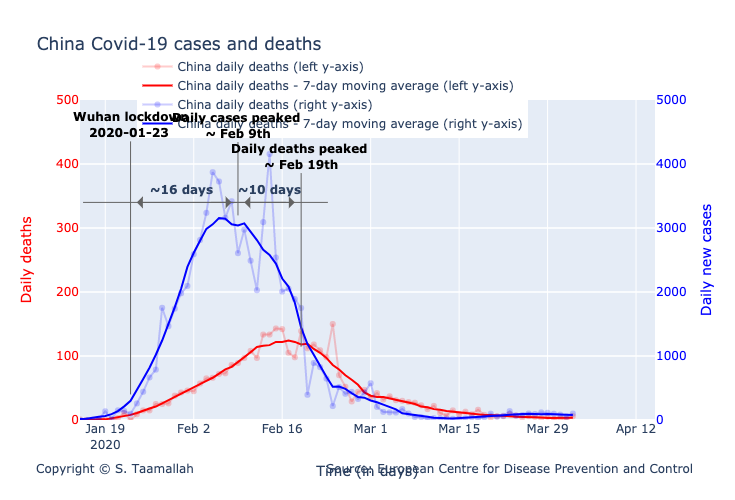

In [43]:
degree = 5

smooth_china_deaths = smoothTriangle(df_china['deaths'],degree)
smooth_china_cases = smoothTriangle(df_china['cases'],degree)

smooth_china_deaths_9day = smooth_9day(df_china['deaths'])
smooth_china_cases_9day = smooth_9day(df_china['cases'])


# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='lines + markers',
        name='China daily deaths (left y-axis)',
        line_color='rgba(256, 0, 0, .2)',
        #showlegend=False,
)

trace11 = go.Scatter(
        x=df_china.index, 
        y=smooth_china_deaths_9day,
        mode='lines',
        name='China daily deaths - 7-day moving average (left y-axis)',
        line_color='rgba(256, 0, 0, 1)',
)

trace2 = go.Scatter(
        x=df_china.index, 
        y=df_china['cases'],
        mode='lines + markers',
        name='China daily deaths (right y-axis)',
        line_color='rgba(0, 0, 256, .2)',
        #showlegend=False,
        yaxis='y2'
)

trace22 = go.Scatter(
        x=df_china.index, 
        y=smooth_china_cases_9day,
        mode='lines',
        name='China daily deaths - 7-day moving average (right y-axis)',
        line_color='rgba(0, 0, 256, 1)',
        yaxis='y2'
)

data = [trace1, trace11, trace2, trace22]

layout = go.Layout(
    title='China Covid-19 cases and deaths',
    legend=dict(x=.1, y=1.15, orientation="h"), 
    width=1100,
    height=500,
    
    # Top left
    xaxis=dict(
        title='Time (in days)',
        range=['2020-01-15', '2020-04-15'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,500],
        color="red",
        anchor='x'
    ),
    yaxis2=dict(
        title = 'Daily new cases',
        color='rgba(0, 0, 256, 1)',
        #type='log',
        range=[0,5000],
        overlaying='y',
        side='right'
    ),
    
       annotations=[
        dict(
            x=1.07,
            y=-0.18,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.08,
            y=-0.18,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
)



fig = go.Figure(data=data, layout=layout)

fig.add_annotation(
            x='2020-01-23',
            y=40,
            xref="x",
            yref="y",
            text="<b> Wuhan lockdown <br> 2020-01-23  </b>",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=0,
        ay=-270,
)




fig.add_annotation(
            x='2020-02-09',
            y=320,
            text="<b>Daily cases peaked <br> ~ Feb 9th </b>",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=0,
        ay=-90,
)


fig.add_annotation(
            x='2020-02-19',
            y=115,
            text="<b>Daily deaths peaked <br> ~ Feb 19th </b>",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=0,
        ay=-190,
)

fig.add_annotation(
            x='2020-02-10',
            y=340,
            text="",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=85,
        ay=0,
)

fig.add_annotation(
            x='2020-02-18',
            y=340,
            text="",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-85,
        ay=0,
)

fig.add_annotation(
            x='2020-02-14',
            y=360,
            text="<b> ~10 days </b>",
            showarrow=False,
)

fig.add_annotation(
            x='2020-01-24',
            y=340,
            text="",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=150,
        ay=0,
)

fig.add_annotation(
            x='2020-02-08',
            y=340,
            text="",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-150,
        ay=0,
)


fig.add_annotation(
            x='2020-01-31',
            y=360,
            text="<b> ~16 days </b>",
            showarrow=False,
)

fig.show()

#from plotly.offline import plot
#plot(fig, filename="STaamallah_covid19_analysis_chart_3_20200331.html", auto_open = False)

<br/>
<br/>

Wuhan implemented a full lockdown as early as january 23rd. At that point, very few people died from Covid-19 in China and about 500 people tested positive to the virus. The number of cases kept rising sharply in the days after the lockdown measures and an inflection point can be observed on Feb 1st, leading to a number of daily cases plateau'ing and reaching a maximum 16 days after the lockdown, around february 9th 2020. Meanwhile, the number of death kept rising and only reached its peak 10 days after the number of daily cases reach its maximum level. 

16 and 10 days, those are the two numbers to keep in mind. Of course, it is also important to note that the peak is closer to a plateau lasting for about 10 days. the peak dates we are extracting here are the middle of the plateau period.

# When is the peak in Europe and U.S. ?





#from IPython.display import HTML, display
#display(HTML('STaamallah_covid19_analysis_chart_3_20200331.html'), metadata=dict(isolated=False))


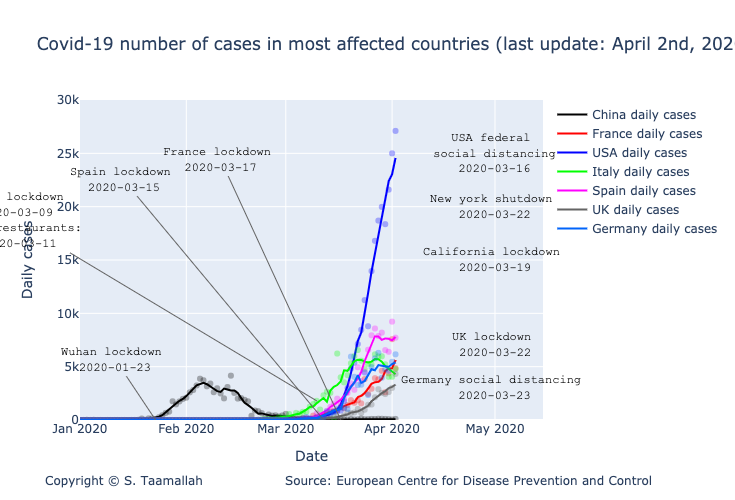

In [44]:
#degree = 2
#smooth_italy = smoothTriangle(df_italy['deaths'],degree)


smooth_china = smooth_5day(df_china['cases'])
smooth_france = smooth_5day(df_france['cases'])
smooth_italy = smooth_5day(df_italy['cases'])
smooth_usa = smooth_5day(df_usa['cases'])
smooth_uk = smooth_5day(df_uk['cases'])
smooth_germany = smooth_5day(df_germany['cases'])
smooth_spain = smooth_5day(df_spain['cases'])
smooth_korea = smooth_5day(df_korea['cases'])
smooth_netherlandss = smooth_5day(df_netherlands['cases'])



# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['cases'],
        mode='markers',
        name='China daily cases',
        line_color='rgba(0, 0, 0, .3)',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_china.index, 
        y=smooth_china,
        mode='lines',
        name='China daily cases',
        line_color='rgba(0, 0, 0, 1)',
)


trace2 = go.Scatter(
        x=df_france.index, 
        y=df_france['cases'],
        mode='markers',
        name='France daily cases',
        line_color='rgba(256, 0, 0, .3)',
        showlegend=False,
)

trace22 = go.Scatter(
        x=df_france.index, 
        y=smooth_france,
        mode='lines',
        name='France daily cases',
        line_color='rgba(256, 0, 0, 1)',
)


trace3 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['cases'],
        mode='markers',
        name='USA daily cases',
        line_color='rgba(0, 0, 255, .3)',
    showlegend=False,
)

trace33 = go.Scatter(
        x=df_usa.index, 
        y=smooth_usa,
        mode='lines',
        name='USA daily cases',
        line_color='rgba(0, 0, 255, 1)',
)

trace4 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['cases'],
        mode='markers',
        name='Italy daily cases',
        line_color='rgba(0, 256, 0, .3)',
    showlegend=False,
)

trace44 = go.Scatter(
        x=df_italy.index, 
        y=smooth_italy,
        mode='lines',
        name='Italy daily cases',
        line_color='rgba(0, 256, 0, 1)',
)

trace5 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['cases'],
        mode='markers',
        name='Spain daily cases',
        line_color='rgba(255, 0, 255, .3)',
    showlegend=False,
)

trace55 = go.Scatter(
        x=df_spain.index, 
        y=smooth_spain,
        mode='lines',
        name='Spain daily cases',
        line_color='rgba(256, 0, 256, 1)',
)


trace6 = go.Scatter(
        x=df_uk.index, 
        y=df_uk['cases'],
        mode='markers',
        name='UK daily cases',
        line_color='rgba(100, 100, 100, .3)',
    showlegend=False
)

trace66 = go.Scatter(
        x=df_uk.index, 
        y=smooth_uk,
        mode='lines',
        name='UK daily cases',
        line_color='rgba(100, 100, 100, 1)',
)

trace7 = go.Scatter(
        x=df_germany.index, 
        y=df_germany['cases'],
        mode='markers',
        name='Germany daily cases',
        line_color='rgba(0, 100, 250, .3)',
    showlegend=False,
)

trace77 = go.Scatter(
        x=df_germany.index, 
        y=smooth_germany,
        mode='lines',
        name='Germany daily cases',
        line_color='rgba(0, 100, 250, 1)',
)


data = [trace1,trace11, trace2, trace22, trace3, trace33, trace4, trace44, trace5, trace55, trace6, trace66, trace7, trace77]

layout = go.Layout(
    title="Covid-19 number of cases in most affected countries (last update: April 2nd, 2020)",
    width=1100,
    height=500,
    
    # Top left
    xaxis=dict(
        title='Date',
        range=['2020-01-01', '2020-05-15'],
    ),
    yaxis=dict(
        title='Daily cases',
        #type='log',
        range=[0,30000],
        anchor='x'
    ),
    
      annotations=[
        dict(
            x=1.24,
            y=-0.22,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.08,
            y=-0.22,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
)



fig = go.Figure(data=data, layout=layout)



fig.add_annotation(
        x='2020-01-23',
        y=20,
        xref="x",
        yref="y",
        text="Wuhan lockdown <br> 2020-01-23 ",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-40,
        ay=-60,
        #bordercolor="#c7c7c7",
        #borderwidth=2,
        #borderpad=4,
        #bgcolor="#ff7f0e",
        #opacity=0.8
        )


fig.add_annotation(
        x='2020-03-10',
        y=1800,
        xref="x",
        yref="y",
        text="Italy lockdown <br> 2020-03-09 <br> bars, restaurants: <br> 2020-03-11",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-300,
        ay=-180,
        #bordercolor="#c7c7c7",
        #borderwidth=2,
        #borderpad=4,
        #bgcolor="#ff7f0e",
        #opacity=0.8
        )


fig.add_annotation(
            x='2020-03-17',
            y=30,
            text="France lockdown <br> 2020-03-17 ",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-120,
        ay=-260,
)


fig.add_annotation(
            x='2020-03-12',
            y=20,
            text="Spain lockdown <br> 2020-03-15 ",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-200,
        ay=-240,
)


fig.add_annotation(
            x='2020-05-1',
            y=7000,
            text="UK lockdown <br> 2020-03-22 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=180,
        ay=-60,
)

fig.add_annotation(
            x='2020-05-1',
            y=3000,
            text="Germany social distancing <br> 2020-03-23 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=180,
        ay=-60,
)

fig.add_annotation(
            x='2020-05-1',
            y=25000,
            text="USA federal <br> social distancing <br> 2020-03-16 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=200,
        ay=-520,
)

fig.add_annotation(
            x='2020-05-1',
            y=20000,
            text="New york shutdown <br> 2020-03-22 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=200,
        ay=-420,
)



fig.add_annotation(
            x='2020-05-1',
            y=15000,
            text="California lockdown <br> 2020-03-19 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=200,
        ay=-320,
)






fig.show()

#from plotly.offline import plot
#plot(fig, filename="STaamallah_covid19_analysis_chart_2_20200331.html", auto_open = False)

</br>

Italy has been under a lockdown since March 9th. Bars, restaurants and non-essential businesses were ordered to close on March 11th. Considering the 12th of March as the effective shutdown day and using a 16 day delay for the number of daily cases to peak (as derived from the China case above), we can expect a peak to be reached around March 28th. In Spain and in France, one can hope for a peak occuring 4 and 6 days later respectively i.e. April 1st and april 3rd. 

It is interesting to see that the number of daily cases in Italy has not increased since March 22nd and remained between 5000 and 6000 per day. A similar observation can be made in Spain with the number of new cases flat since March 27th. 

If the number of cases indeed eaked in Italy and Spain, then we should expect 

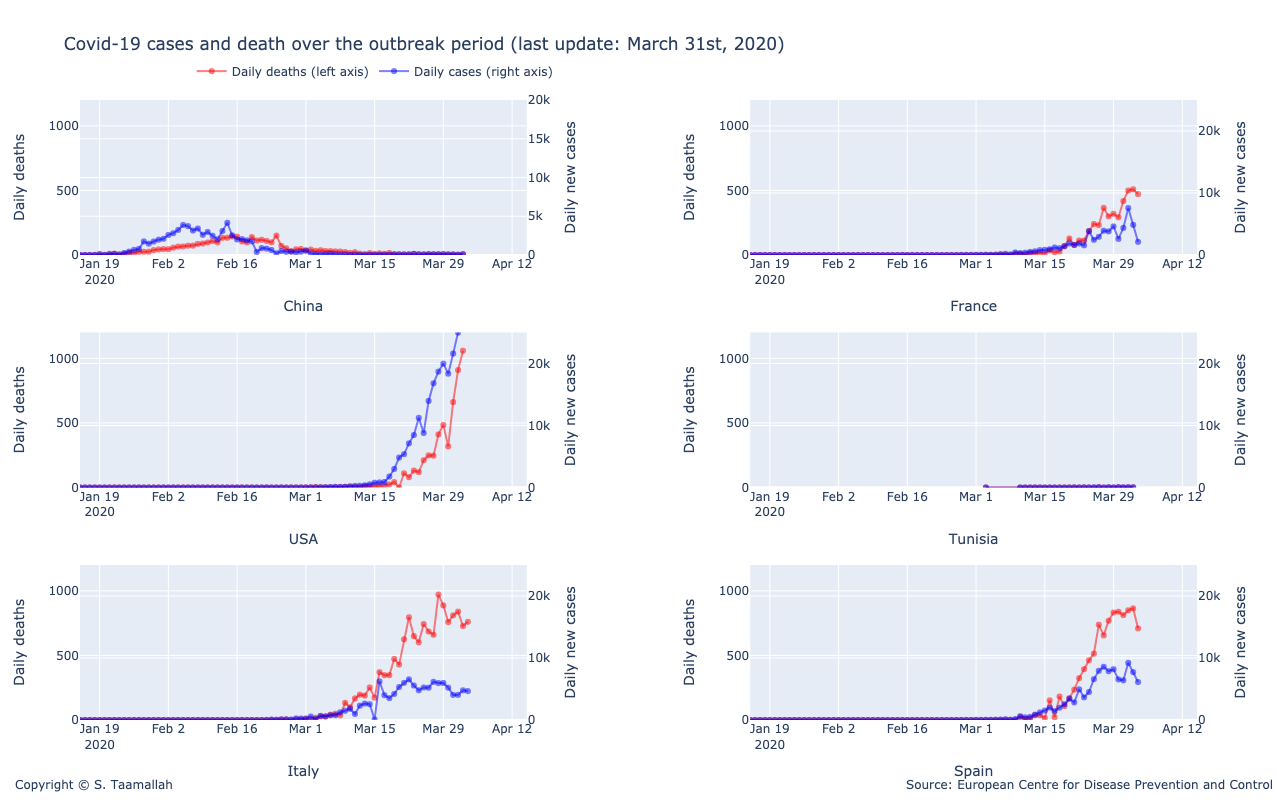

'STaamallah_covid19_analysis_chart_1_20200331.html'

In [57]:
#plotting number of cases and number of deaths for different countries
# all charts using same scale for ease of comparison
# number of death are on the left y-axis. 

# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='lines+markers',
        name='Daily deaths (left axis)',
        line_color='rgba(256, 0, 0, .5)',
)
trace2 = go.Scatter(
        x=df_china.index, 
        y=df_china['cases'],
        mode='lines+markers',
        name='Daily cases (right axis)',
        line_color='rgba(0, 0, 256, .5)',
        yaxis='y2'
)
trace3 = go.Scatter(
        x=df_france.index, 
        y=df_france['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        showlegend=False,
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x2',
        yaxis='y3'
)
trace4 = go.Scatter(
        x=df_france.index, 
        y=df_france['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x2',
        yaxis='y4',
        showlegend=False,
)
trace5 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x3',
        yaxis='y5',
        showlegend=False,
)
trace6 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x3',
        yaxis='y6',
        showlegend=False,
)
trace7 = go.Scatter(
        x=df_tunisia.index, 
        y=df_tunisia['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x4',
        yaxis='y7',
        showlegend=False,
)
trace8 = go.Scatter(
        x=df_tunisia.index, 
        y=df_tunisia['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x4',
        yaxis='y8',
        showlegend=False,
)


trace9 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x5',
        yaxis='y9',
        showlegend=False,
)

trace10 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x5',
        yaxis='y10',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x6',
        yaxis='y11',
        showlegend=False,
)
trace12 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x6',
        yaxis='y12',
        showlegend=False,
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = go.Layout(
    title='Covid-19 cases and death over the outbreak period (last update: March 31st, 2020)',
    legend=dict(x=.1, y=1.07, orientation="h"), 
    width=800,
    height=800,
    
    annotations=[
        dict(
            x=1.07,
            y=-0.12,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.06,
            y=-0.12,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
    # Top left
    xaxis=dict(
        title='China',
        domain=[0, 0.4],
        range=['2020-01-15', '2020-04-15'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,1200],
        domain=[0.75, 1],
        anchor='x'
    ),
    yaxis2=dict(
        title = 'Daily new cases',
        #type='log',
        range=[0,20000],
        overlaying='y',
        side='right'
    ),
    

    # Top right
    xaxis2=dict(
        title='France',
        range=['2020-01-15', '2020-04-15'],
        domain=[0.6, 1.0],
        anchor='y3'
    ),
    yaxis3=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.75, 1],
        anchor='x2',
        range=[0,1200],

    ),
    yaxis4=dict(
        title = 'Daily new cases',
        domain=[0.6, 1.0],
        overlaying='y3',
        range=[0,25000],
        side='right',
        anchor='x2'
    ),

    # middle left
    xaxis3=dict(
        title='USA',
        range=['2020-01-15', '2020-04-15'],
        domain=[0, 0.4],
        anchor='y5'
    ),
    yaxis5=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.375, 0.625],
        range=[0,1200],
        anchor='x3'
    ),
    yaxis6=dict(
        title = 'Daily new cases',
        domain=[0.375, 0.625],
        overlaying='y5',
        range=[0,25000],
        side='right',
        anchor='x3'
    ),

    # middle right
    xaxis4=dict(
        title='Tunisia',
        range=['2020-01-15', '2020-04-15'],
        domain=[0.6, 1.0],
        anchor='y7'
    ),
    yaxis7=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.375, 0.625],
        range=[0,1200],
        anchor='x4'
    ),
    yaxis8=dict(
        title = 'Daily new cases',
        domain=[0.375, 0.625],
        overlaying='y7',
        range=[0,25000],
        side='right',
        anchor='x4'
    ),
    
    # Bottom left
    xaxis5=dict(
        title='Italy',
        range=['2020-01-15', '2020-04-15'],
        domain=[0, 0.4],
        anchor='y9'
    ),
    yaxis9=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0, 0.25],
        range=[0,1200],
        anchor='x5'
    ),
    yaxis10=dict(
        title = 'Daily new cases',
        domain=[0, 0.25],
        overlaying='y9',
        range=[0,25000],
        side='right',
        anchor='x5'
    ),
    
    # Bottom bottom right
    xaxis6=dict(
        title='Spain',
        range=['2020-01-15', '2020-04-15'],
        domain=[0.6, 1.0],
        anchor='y11'
    ),
    yaxis11=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0, 0.25],
        range=[0,1200],
        anchor='x6'
    ),
    yaxis12=dict(
        title = 'Daily new cases',
        domain=[0, 0.25],
        overlaying='y11',
        range=[0,25000],
        side='right',
        anchor='x6'
    )
    
)


    
fig = go.Figure(data=data, layout=layout)


fig.show()


#py.plot(data, filename = 'basic-line', auto_open=True)

#py.plot(data, filename='privacy-public', sharing='public')

from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_1_20200331.html", auto_open = False)

It seems to be an outlier on Feb 13th. with Feb 13th deaths too high and feb 14th too low. These two will be averaged